In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 

In [2]:
rate = pd.read_csv('data.csv')
data=pd.read_csv('st1.csv')

In [3]:
size = int(len(data) * 0.57)

In [4]:
train, valid = data[0:size], data[size:size+52]

In [5]:
#positive correlation features
features = ['aids','burial','cremation','death','diabetes','funeral',
              'funeral_director','gun_shot','heart_disease','lung_cancer',
              'mortality','stroke','suicide','lethal_injection',
              'knife','fire','malnutrition','alcohol','dementia','Christmas','new_year',
              'infant_mortality','cough','winter','snow','ice','freeze',
              'headache','symptom','abdominal_pain','vomiting','dropsy',
              'obesity','Alzheimers','pressure','bloody','despair',
              'inflammation','arthritis','warm','hospital','debt','desperate',
              'cholesterol','heart_attack','hypothermia','lonely','respiratory',
              'temperature','vaccine','damp','pregnancy','poverty',
              'insulation','blood_pressure','thrombosis','migration','heart_rate','January',
              'December','death_register','funeral_flower','toxin',
              'anxiety','mood_disorder','unemployment','gastrointestinal','sendentary','overcrowded',
              'housing_tenure','emigration','lifestyle',
              'ischaemic','cardiac','violence','aortic','aneurysm','pulmonary',
              'Pulmonary_embolism','influenza','asthma','pneumonia','epilepsy',
              'stillbirth','blood_viscosity','air_pollution','lung_disease','deprivation',
              'urbanicity','pathophysiological','surgery','myocardial','convulsion',
              'Major_Depressive_Disorder','after_death','funeral_arrangements','first_call',
              'funeral_ceremony','funeral_services','condolences','death_certificate',
              'funeral_home','church','death_notice','paper_thin',
              'lose_weight','appetite_loss','physical_weakness','mental_confusion','Shortness_of_breath',
            'incontinence','blotchy_hands',
              'purple_hands','suffocation',
              'death_symbol','coffin','Christian_Cross','cancer','funeral_news','births_deaths',
              'chemotherapy','ultrasound','radiotherapy','paperdoll','dietary','death_row',
              'slime','tinnitus','energy_cost','psychiatric','hypertension',
              'homelessness','drug_therapy','hepatic','rhinitis','bronchitis','panic_disorder',
              'infarction','myocardial_infarction','funeral_plans','obtunded','dry_cough',
              'wheezing','nervosa','bulimia_nervosa','tickly_cough',
              'funeral_insurance','bronchitis_cough','death_anxiety','dream_death','death_rattle',
            'mumble','life_review','delirium','funeral_songs','home_death','suicide_methods',
            'exsanguination','carbon_monoxide_poisoning','alcohol_abuse','life_expectancy',
            'self_harming','murder','manslaughter','deicide','crucifixion',
            'murder_weapon','purple_feet',
            'food_poisoning','palpitation','nausea','citalopram','funeral_dresses','pandemia',
            'obituary','mucus_cough','chesty_cough','phlegm','domestic_violence',
            'ear_infections','sore_throat',
            'rheumatiod','tonsillitis','amitriptyline','opiates','pain_medicine','palliative_care',
            'opioids','neuropathic_pain','memory_loss','morphine','famine','perinatal_mortality',
            'congenital_disease','neonatal','preterm',
            'weak_pulse','emergency','treatment','fight',
            'homicide','New_Years_eve','car_ownership','chill','energy_prices','sleep_longer',
            'sharp_pain','heart_failure','memorial_service',
            'ischaemic_heart_disease','Chronic_Obstructive_Pulmonary_Disease','trachea',
            'tuberculosis','liver_disease','poor_diet','bowel','bowel_disease','bowel_cancer',
            'cervical','high_cholesterol','swine_flu','rape','assualt','strangulation',
            'narcotics','cervical_cancer','ankles_swell',
            'delusion','neoplasms','genitourinary','endocrine_disease',
            'endocrine','blood_disease','metabolic_disease','metabolic','physical_inactivity','arteries'
           ]

y_train = rate['weeklydeathrate'][0:size].values
x_train = train[features]
x_valid = valid[features]
y_valid = rate['weeklydeathrate'][size:size+52].values

In [6]:
#index of test data set
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('data.csv',parse_dates=['date'],index_col=0,date_parser=dateparse)
L=data.index[size:size+52]

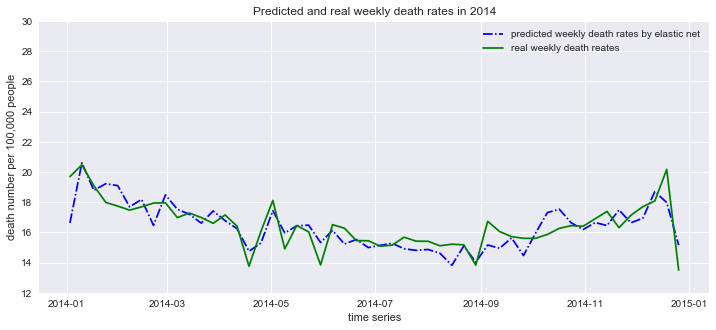

In [7]:
#forecast of weekly death rates in England
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.695,l1_ratio=0.5,max_iter=10000,tol=0.0001)
y_pred_enet = enet.fit(x_train, y_train).predict(x_valid)

x = L
m = y_pred_enet
z = y_valid
fig = plt.figure(figsize=(12,5))
plt.plot(x,m,label='predicted weekly death rates by elastic net',color="blue",linestyle='-.')
plt.plot(x,z,label='real weekly death reates',color='green')
plt.xlabel("time series")
plt.ylabel("death number per 100,000 people")
plt.title("Predicted and real weekly death rates in 2014")
from pylab import *
ylim(12,30)
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, make_scorer
mse = mean_squared_error(y_valid, y_pred_enet)
RMSE=np.sqrt(mse)
RMSE

0.95447328936001807

In [9]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_valid, y_pred_enet, sample_weight=None, multioutput='uniform_average')
MAE

0.73559382292517916

In [10]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100)
mape = mean_absolute_percentage_error(y_valid, y_pred_enet)
mape

4.4491844507931404

In [11]:
np.corrcoef(y_valid, y_pred_enet)

array([[ 1.        ,  0.79408317],
       [ 0.79408317,  1.        ]])

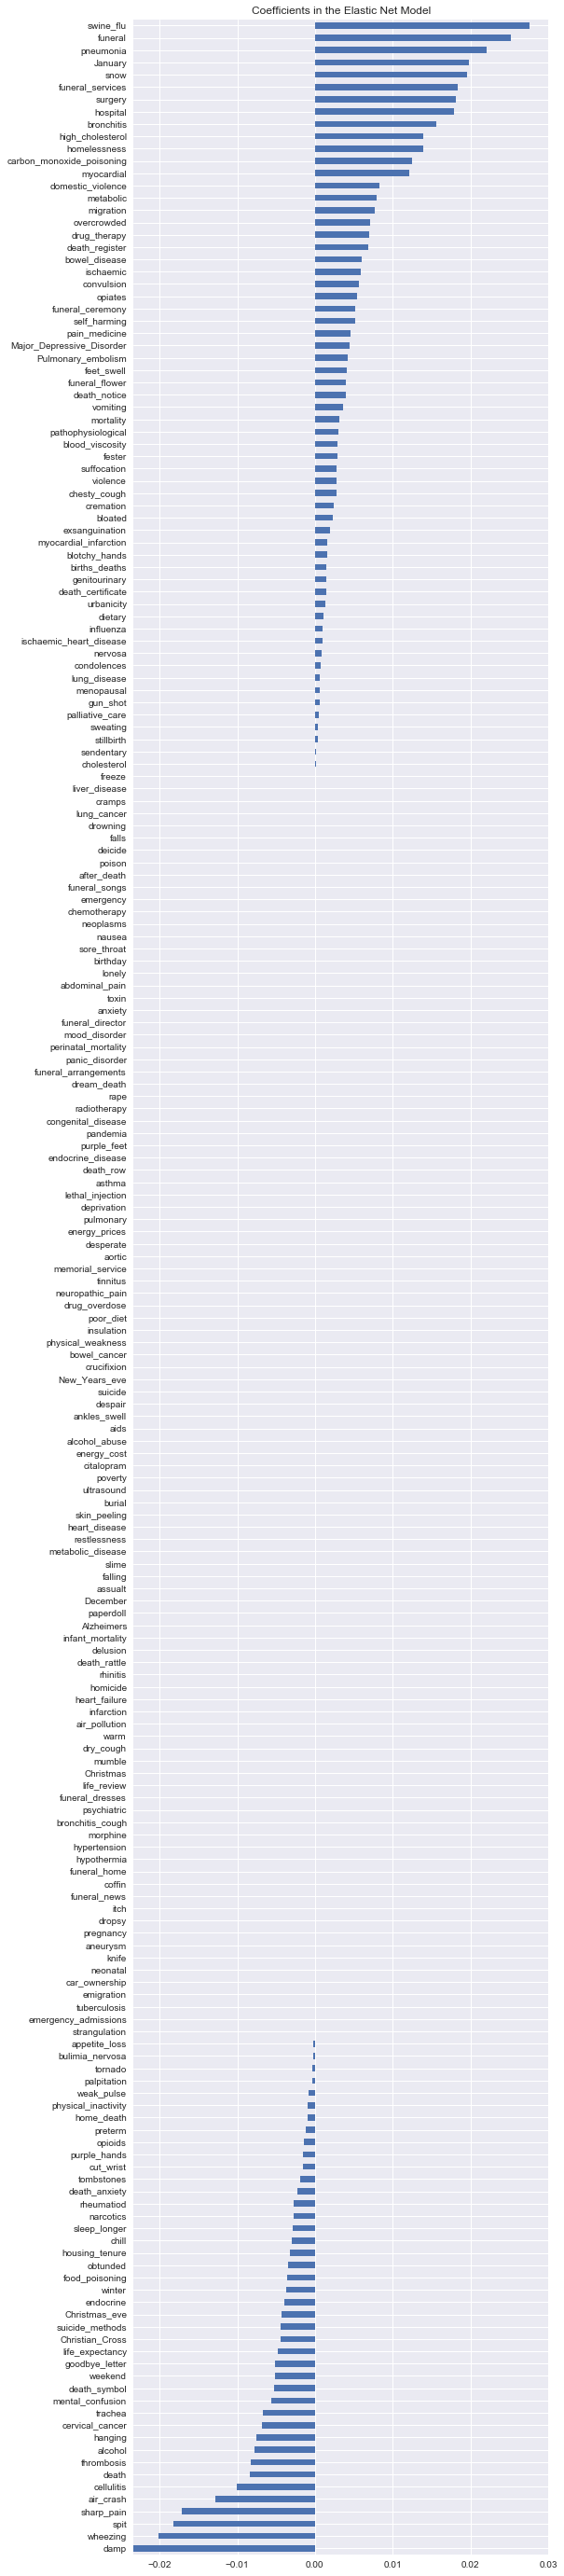

In [12]:
coef = pd.Series(enet.coef_, index = x_train.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 50.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")